<a href="https://colab.research.google.com/github/willkakuta/Material_de_Aula/blob/main/Resolu%C3%A7%C3%A3o_DAY6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Analisando os dados do dataset***

# ***Etapas 1 e 2***

***Importando as bibliotecas necessárias para utilizar na alisa e plotagem de gráficos***

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

***Carregando o dataset***

In [ ]:
!unzip 2019-Nov.zip

Archive:  2019-Nov.zip
replace 2019-Nov.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
df = pd.read_csv('2019-Nov.csv')

***Verificando como estão dispostos os dados***

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
6,2019-11-01 00:00:25+00:00,view,5856189,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
8,2019-11-01 00:00:34+00:00,remove_from_cart,5870838,1487580007675986893,NaN,milv,0.79,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a
9,2019-11-01 00:00:37+00:00,view,5870803,1487580007675986893,NaN,milv,0.79,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a


***Verificando o tamanho do dataset (linhas, colunas)***

In [ ]:
df.shape

(4635837, 9)

***Verificando estatísticas***

In [ ]:
with pd.option_context('display.float_format', '{:.2f}'.format):
  display(df.describe())

,product_id,category_id,price,user_id
count,2509185.00,2509185.00,2509185.00,2509185.00
mean,5387050.14,1540481041512275968.00,9.25,507596218.46
std,1490305.17,141434001754855520.00,21.29,85524734.37
min,3752.00,1487580004832248576.00,0.00,1120748.00
25%,5734565.00,1487580006132483072.00,1.90,470786013.00
50%,5810145.00,1487580008162526208.00,4.00,544141042.00
75%,5854812.00,1487580013388628224.00,6.75,568454539.00
max,5909246.00,2195085258272014592.00,327.78,579969854.00


***Agrupando itens e fazendo a contagem***

In [ ]:
df.groupby(by=['user_session', 'event_type', 'product_id', 'event_time']).size().sort_values(ascending=False)

user_session                          event_type        product_id  event_time             
11285886-37b7-4487-ba38-01ca9a01a271  remove_from_cart  5819114     2019-11-21 18:46:01 UTC    23
1d2c4867-d62b-4326-beeb-ee17c0d1b825  remove_from_cart  5758984     2019-11-15 14:08:23 UTC    20
ef80e069-35c2-4af3-895f-1ee1a2cd0c4c  remove_from_cart  5700032     2019-11-29 15:31:05 UTC    19
018ee332-436a-44fe-96fc-c5318c5e2d5a  remove_from_cart  5773392     2019-11-08 15:18:56 UTC    19
f0e2ae04-7ee3-4244-9ce5-ced188608371  cart              5310        2019-11-12 17:49:12 UTC    17
                                                                                               ..
57f16a01-21db-41b4-9afe-03ead6466506  cart              5903781     2019-11-30 23:40:26 UTC     1
                                                        5903809     2019-11-30 23:40:36 UTC     1
                                                        5903960     2019-11-30 23:41:05 UTC     1
                          

In [ ]:
df.groupby(by=['user_session', 'event_type', 'product_id', 'event_time'])['user_session'].count().sort_values(ascending=False)

user_session                          event_type        product_id  event_time             
11285886-37b7-4487-ba38-01ca9a01a271  remove_from_cart  5819114     2019-11-21 18:46:01 UTC    23
1d2c4867-d62b-4326-beeb-ee17c0d1b825  remove_from_cart  5758984     2019-11-15 14:08:23 UTC    20
ef80e069-35c2-4af3-895f-1ee1a2cd0c4c  remove_from_cart  5700032     2019-11-29 15:31:05 UTC    19
018ee332-436a-44fe-96fc-c5318c5e2d5a  remove_from_cart  5773392     2019-11-08 15:18:56 UTC    19
f0e2ae04-7ee3-4244-9ce5-ced188608371  cart              5310        2019-11-12 17:49:12 UTC    17
                                                                                               ..
57f16a01-21db-41b4-9afe-03ead6466506  cart              5903781     2019-11-30 23:40:26 UTC     1
                                                        5903809     2019-11-30 23:40:36 UTC     1
                                                        5903960     2019-11-30 23:41:05 UTC     1
                          

***Verificando o tamanho que ficaria após remover as duplicatas***

In [ ]:
df[['user_session', 'event_type', 'product_id', 'event_time']].drop_duplicates().shape

(4389144, 4)

***Removendo duplicadas***

In [ ]:
df = df.drop_duplicates(subset=['user_session', 'event_type', 'product_id', 'event_time'])

***Verificando a unicidade das variáveis***

In [ ]:
df.groupby(by=['user_session', 'event_type', 'product_id', 'event_time'])['user_session'].count().sort_values(ascending=False)

user_session                          event_type        product_id  event_time             
00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04  view              5829298     2019-11-05 07:57:05 UTC    1
aaf58d02-084b-4f11-be31-cb82b7e885cf  remove_from_cart  5881773     2019-11-21 15:30:05 UTC    1
                                      cart              5783930     2019-11-21 15:17:06 UTC    1
                                                        5859489     2019-11-21 15:15:54 UTC    1
                                                        5861102     2019-11-21 15:25:01 UTC    1
                                                                                              ..
559df782-0e63-4a41-8cd6-cd4802c25708  cart              5875432     2019-11-23 08:02:29 UTC    1
                                                        5885840     2019-11-23 08:09:52 UTC    1
                                                        5887014     2019-11-23 08:17:15 UTC    1
                                   

# ***Etapa 3***

***Transformando as datas que são strings em datas no formato correto***

In [ ]:
df['event_time'] = pd.to_datetime(df.event_time, format="%Y-%m-%d %H:%M:%S %Z")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


***Verificando o formato***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4389144 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 334.9+ MB


***Verificando os dados da coluna event_time***

In [ ]:
df[['event_time']].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,event_time
count,4389144
unique,1810735
top,2019-11-18 01:17:08+00:00
freq,279
first,2019-11-01 00:00:02+00:00
last,2019-11-30 23:59:58+00:00


# ***Etapa 4***

***Verificando a quantidade de produto por marcas***

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02+00:00,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09+00:00,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [ ]:
df['brand'].value_counts()

runail       304915
grattol      192985
irisk        191367
masura       173282
bpw.style    123356
              ...  
shifei            3
macadamia         2
footlogix         2
dessata           2
ibd               1
Name: brand, Length: 239, dtype: int64

In [ ]:
df.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

brand
masura       1562
irisk        1325
runail       1274
freedecor     840
bluesky       763
             ... 
frozen          1
philips         1
rasyan          1
lunaris         1
s.care          1
Name: product_id, Length: 239, dtype: int64

***Verificando se existem valores nulos no brand***

In [ ]:
df.brand.isna().value_counts()

False    2509185
True     1879959
Name: brand, dtype: int64

***Retirando itens que não possuem marca***




In [ ]:
df = df.dropna(subset=['brand'])
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
6,2019-11-01 00:00:25+00:00,view,5856189,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
8,2019-11-01 00:00:34+00:00,remove_from_cart,5870838,1487580007675986893,NaN,milv,0.79,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a
9,2019-11-01 00:00:37+00:00,view,5870803,1487580007675986893,NaN,milv,0.79,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a


***Verificando se os nulos foram removidos***

In [ ]:
df.brand.isna().value_counts()

False    2509185
Name: brand, dtype: int64

# ***Etapa 5***

***Verificar se existem valores nulos***

In [ ]:
df[['price']].describe(percentiles=[.01,.1, .25, .5, .75, .99]).round(2)

,price
count,2509185.00
mean,9.25
std,21.29
min,0.00
1%,0.32
10%,0.95
25%,1.90
50%,4.00
75%,6.75
99%,122.22


In [ ]:
df.price.quantile([.01,.1, .25, .5, .75, .99])

0.01      0.32
0.10      0.95
0.25      1.90
0.50      4.00
0.75      6.75
0.99    122.22
Name: price, dtype: float64

In [ ]:
Q1,Q3 = df.price.quantile([.25, .75])
IQR = Q3 - Q1

print(Q1, Q3, IQR)

1.9 6.75 4.85


In [ ]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(f'Lower bound is {lower_bound} and the upper bound is {upper_bound}.')

Lower bound is -5.375 and the upper bound is 14.024999999999999.


***Calculando valor máximo***

In [ ]:
df['price'].max()

273.02

***Calculando valor mínimo***

In [ ]:
df['price'].min()

0.06

# ***Etapa 6***

***Conferindo se há valores nulos na coluna event_type***

In [ ]:
df.event_type.isna().value_counts()

False    2509185
Name: event_type, dtype: int64

***Definindo o eixo X do gráfico (TIPO DE EVENTO VS QUANTIDADE)***



In [ ]:
df['event_type'].value_counts()

view                1197779
cart                 730708
remove_from_cart     396337
purchase             184361
Name: event_type, dtype: int64

In [ ]:
x = df['event_type'].value_counts().index
x

Index(['view', 'cart', 'remove_from_cart', 'purchase'], dtype='object')

***Definindo o eixo Y do gráfico (TIPO DE EVENTO VS QUANTIDADE)***



In [ ]:
y = df['event_type'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



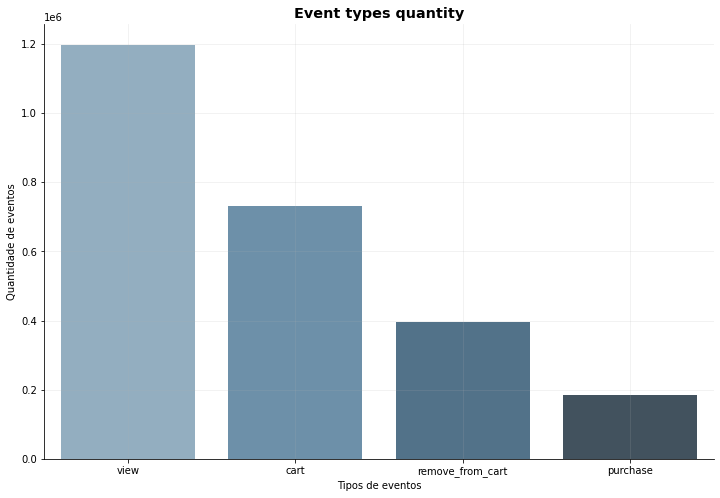

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Event types quantity', weight='bold', size='x-large')
sns.barplot(x, y, saturation=0.5, order=['view', 'cart', 'remove_from_cart', 'purchase'], palette="Blues_d")
plt.ylabel('Quantidade de eventos')
plt.xlabel('Tipos de eventos')
plt.grid(True, alpha=.2)
sns.despine()
plt.show()

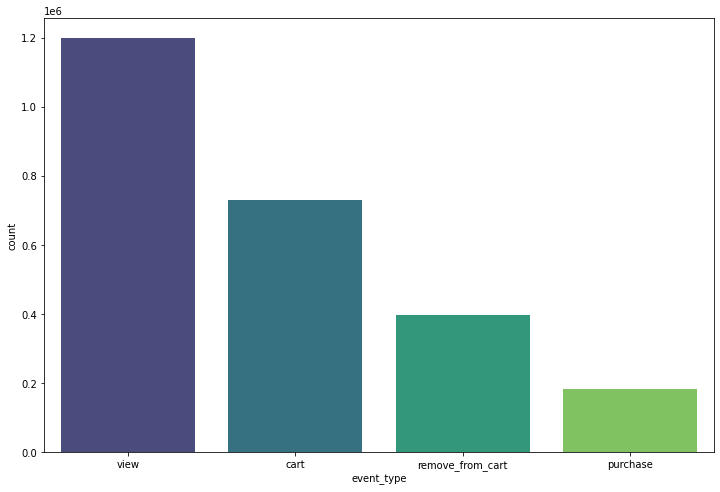

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='event_type', palette='viridis')

***Plotando o gráfico por seaborn (TIPO DE EVENTO VS QUANTIDADE)***



In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df['event_type'].value_counts().index, 
    y=df['event_type'].value_counts(),
    marker_color='lightblue'))


fig.update_layout(
    yaxis=dict(
        title='Quantidade de Eventos',
        titlefont_size=16,
        tickfont_size=16,
    ),
    xaxis=dict(
        title='Tipos de Evento',
        titlefont_size=16,
        tickfont_size=16,
    )
  )

In [ ]:
# ***Etapa 7***

**Verificando as 5 marcas mais vendidas**

In [ ]:
df1 = df[df['event_type'] == 'purchase']

In [ ]:
contagem_marcas = df1['brand'].value_counts().to_frame().reset_index()
contagem_marcas.columns = ['Marca', 'Quantidade']
contagem_marcas

,Marca,Quantidade
0,runail,25997
1,irisk,16364
2,grattol,13613
3,bpw.style,12985
4,masura,11435
...,...,...
208,sun,1
209,helloganic,1
210,ovale,1
211,neoleor,1


In [ ]:
contagem_marcas_top5 = contagem_marcas.head()
contagem_marcas_top5

,Marca,Quantidade
0,runail,25997
1,irisk,16364
2,grattol,13613
3,bpw.style,12985
4,masura,11435


**Plotando as 5 marcas mais vendidas**

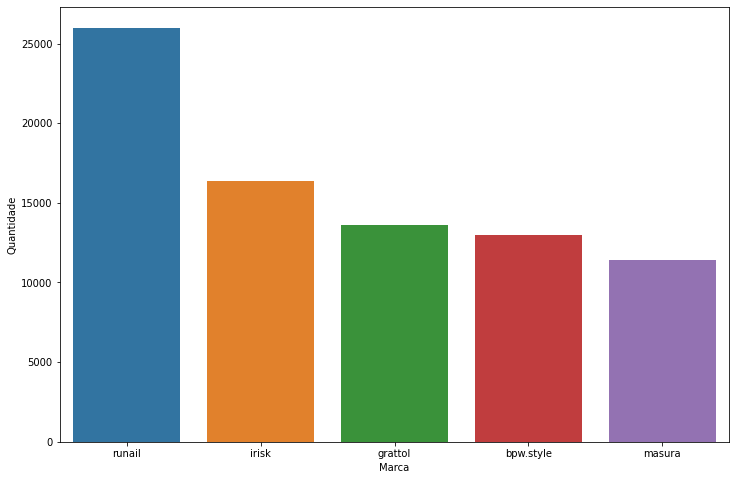

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=contagem_marcas_top5, x='Marca', y='Quantidade')

In [ ]:
px.bar(contagem_marcas_top5, x='Marca', y='Quantidade')

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=contagem_marcas_top5['Marca'], 
    y=contagem_marcas_top5['Quantidade'],
    marker_color='Darkblue'))


fig.update_layout(
    yaxis=dict(
        title='Quantidade',
        titlefont_size=16,
        tickfont_size=16,
    ),
    xaxis=dict(
        title='Marca',
        titlefont_size=16,
        tickfont_size=16,
    )
    )